#Implementing MNIST Classifier using Keras but without CNN
Accuracy achieved - test-99.33
---
1. loading libraries
2. loading MNIST Dataset
3. Normalize the data
4. Data Augmentation for better accuracy
5.  One-Hot encoding
6. Defining the layers of the sequential model 
7. Build the neural network with 3 hidden layers(relu) and one output layer (softmax)
8. Plotting the testing and training accuracy
9. calculating the accuracy score
10. visualizing the confusion matrix.
11. getting and plotting the common errors of the model


#importing necessary libraries

In [73]:
import keras
import pandas as pd
import numpy as np,sys
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import matplotlib
from sklearn.metrics import confusion_matrix
matplotlib.use('agg')
import matplotlib.pyplot as plt

#Loading the MNIST data set

In [74]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plotting the mist digit images

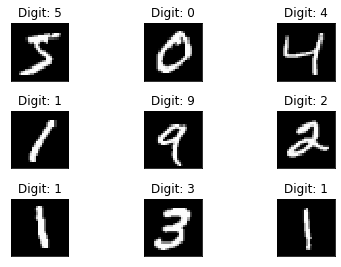

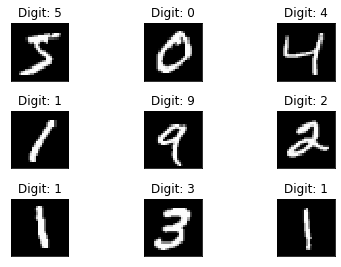

In [75]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

#code to normalize the input data

In [76]:

# getting the input vector from pixels
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data
X_train /= 255
X_test /= 255

# getting the shape of input 
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


#One-Hot Encoding 

In [77]:
# Doing one hot encoding
n_classes = 10
print("Shape of data before one hot encoding ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape of data after one-hot encoding: ", Y_train.shape)

Shape of data before one hot encoding  (60000,)
Shape of data after one-hot encoding:  (60000, 10)


#reshaping the data to make it fittable to the data augmentor

In [78]:
# reshaping  both X_train and X_test
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
# int to float conversion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#data augmentatioin to improve the accuracy

In [79]:
#data augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

#fitting the ImageDataGenerator over X_train with arguement augment as true
datagen.fit(X_train, augment=True)

In [80]:
# Building the model with three hidden layers relu and one output layer-softmax
#sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
#first hidden layer - relu
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512, input_shape=(784,)))
#second hidden layer - relu
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(300))
#third hidden layer - relu
model.add(Activation('relu'))
model.add(Dropout(0.2))

#output layer - softmax
model.add(Dense(10))
model.add(Activation('softmax'))

In [81]:
# Compiling the model in keras before using used categorical_crossentropy
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [82]:
X_train=X_train.reshape(len(X_train),784) # reshaping training data back to fit the model
X_test=X_test.reshape(len(X_test),28*28)# reshaping test data back to fit the model 

In [83]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


Epoch 1/20
469/469 - 9s - loss: 0.2617 - accuracy: 0.9215 - val_loss: 0.1048 - val_accuracy: 0.9678
Epoch 2/20
469/469 - 8s - loss: 0.1100 - accuracy: 0.9663 - val_loss: 0.0760 - val_accuracy: 0.9765
Epoch 3/20
469/469 - 8s - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.0856 - val_accuracy: 0.9747
Epoch 4/20
469/469 - 8s - loss: 0.0668 - accuracy: 0.9793 - val_loss: 0.0741 - val_accuracy: 0.9795
Epoch 5/20
469/469 - 8s - loss: 0.0531 - accuracy: 0.9831 - val_loss: 0.0685 - val_accuracy: 0.9811
Epoch 6/20
469/469 - 8s - loss: 0.0502 - accuracy: 0.9838 - val_loss: 0.0569 - val_accuracy: 0.9832
Epoch 7/20
469/469 - 8s - loss: 0.0409 - accuracy: 0.9870 - val_loss: 0.0781 - val_accuracy: 0.9791
Epoch 8/20
469/469 - 8s - loss: 0.0393 - accuracy: 0.9876 - val_loss: 0.0646 - val_accuracy: 0.9815
Epoch 9/20
469/469 - 8s - loss: 0.0355 - accuracy: 0.9890 - val_loss: 0.0703 - val_accuracy: 0.9805
Epoch 10/20
469/469 - 8s - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.0731 - val_accuracy: 0.9812

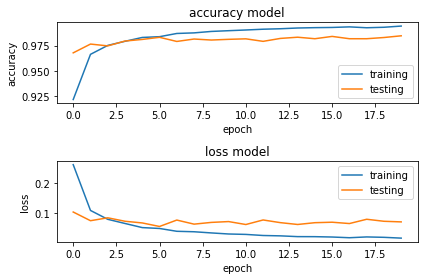

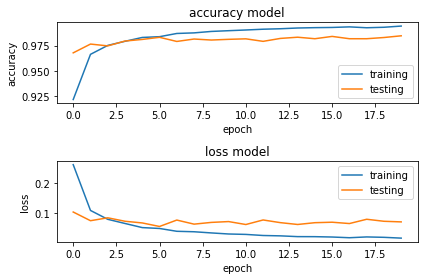

In [84]:
# training the model and saving metrics in mnist_model
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))
# plotting the plot for accuracy and loss
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'testing'], loc='upper right')

plt.tight_layout()
fig


#reshaping the X_train and X_test to fit the model for prediction

In [85]:
X_train=X_train.reshape(len(X_train),784) # reshaping training data back to fit the model
X_test=X_test.reshape(len(X_test),28*28)# reshaping test data back to fit the model 

In [86]:
#checking the shape of the X and Y train and test splits
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


#Plotting the Confusion Matrix between the actual labels and predicted

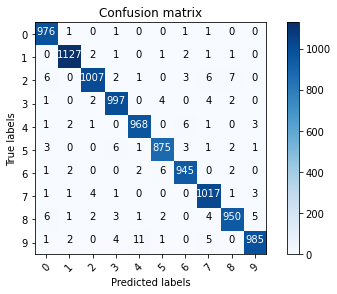

In [87]:
# Confusion matrix plotting for the actual and y_pred values
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels')
# prediction
Y_pred = model.predict(X_test)
# one hot encoding 
Y_pred = np.argmax(Y_pred, axis = 1) 
# one hot encoding
actual_labels = np.argmax(Y_test, axis = 1) 
# plotting the confusion matrix for the actual labels nd y_pred
confusion_mtrx = confusion_matrix(actual_labels, Y_pred) 
# confusion matrix
plot_confusion_matrix(confusion_mtrx, classes = range(10))

#getting the common errors the model makes from making predictions of actual labels and prediction

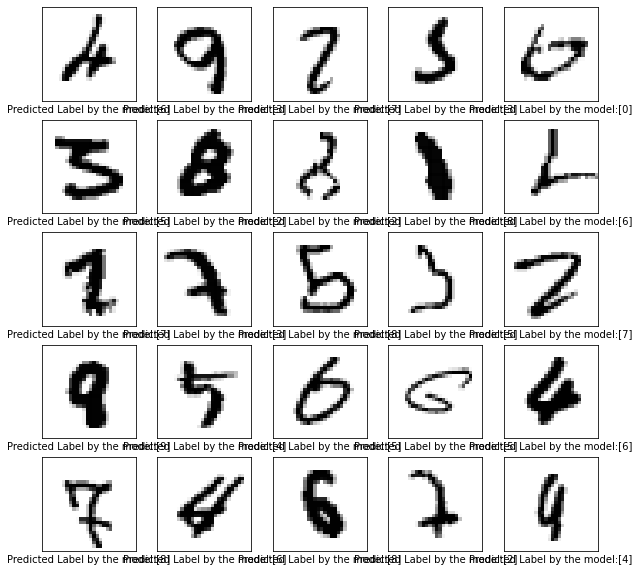

In [88]:
#common errors of ypred from actual labels
err_index = []
for i in range(0, len(Y_pred)):
  if(Y_pred[i] != actual_labels[i]):
    #appending the erroneous labels index
    err_index.append(i)
# plotting the predicted from actual digit images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[err_index[i]].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel("Predicted Label by the model:" + str([Y_pred[err_index[i]]]))
plt.show()